#cifar10

**Description: The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.**

#1. Load the Dataset

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

#Visualize Data using plt (Plot image)

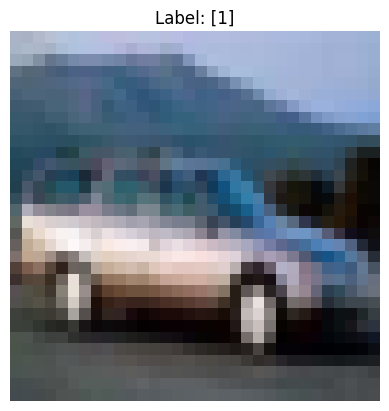

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[4]) # If we want, we can convert iamges into gray for simplicity by camp='gray'
plt.title(f"Label: {Y_train[4]}")
plt.axis('off')
plt.show()

#To See 10 images togather we use loop

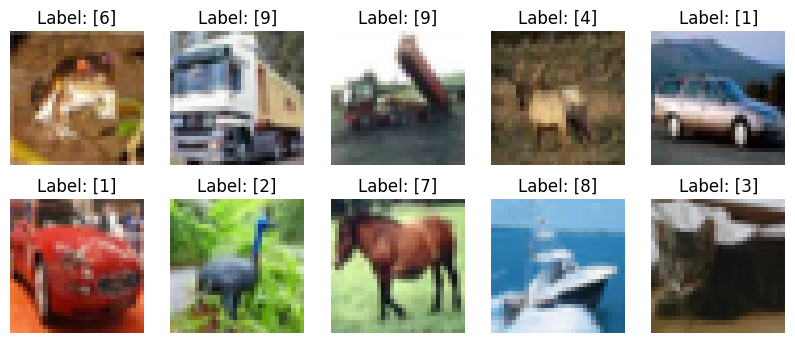

In [16]:
plt.figure(figsize=(10,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i])
  plt.title(f"Label: {Y_train[i]}")
  plt.axis('off')
plt.show()

#2. Normalization pixel values to the range [0, 1]
Our images are in 2D but Neural Network wants 1D vector. So, we will use normalization

In [17]:
X_train = X_train/255.0
X_test = X_test/255.0

#3. Convert the labels to one-dimensional arrays
Flatten layer

In [20]:
Y_train.shape # After running this, amra dekhbo er shape (50k, 1). Means 50K Row and a Single columns. Basically means 2D (Row x Column)
# We will try flatten them

(50000, 1)

In [21]:
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()

In [23]:
Y_train # Output see single array: array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

# 4. Neural network model create korbo
#Sequential API use korvo

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
cnn_model = models.Sequential()

# 5. First Convolutional Block

In [31]:
cnn_model.add(layers.Conv2D(32, (3,3), # Here, 32 is total number of karnel, karnel size (3x3)
                            activation='relu',
                            input_shape=(32,32,3) # Image e size and channel
                            ))

cnn_model.add(layers.BatchNormalization()) # To make more robust model (Faster conversion)
cnn_model.add(layers.MaxPooling2D((2,2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#6. Second Convolutional Block

In [35]:
cnn_model.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2,2)))

#7. 3rd Convolution Block

In [36]:
cnn_model.add(layers.Conv2D (128, (3,3),activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2,2)))

#8. Fully Connected Layer

In [39]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.5)) # Dropout for check overfit
cnn_model.add(layers.Dense(10, activation='softmax'))

#9. Print the model Summary

In [41]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,796 (639.83 KB)

 Trainable params: 163,348 (638.08 KB)

 Non-trainable params: 448 (1.75 KB)

# 10. compile the model

In [42]:
cnn_model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#11. Train/Fit the model

In [44]:
history = cnn_model.fit(X_train, Y_train,
                        epochs = 20,
                        batch_size = 64,
                        validation_split = 0.2,
                        verbose=2
                        )

Epoch 1/20
625/625 - 3s - 5ms/step - accuracy: 0.7100 - loss: 0.8613 - val_accuracy: 0.6683 - val_loss: 0.9921
Epoch 2/20
625/625 - 3s - 4ms/step - accuracy: 0.7298 - loss: 0.8109 - val_accuracy: 0.6917 - val_loss: 0.9609
Epoch 3/20
625/625 - 5s - 8ms/step - accuracy: 0.7422 - loss: 0.7727 - val_accuracy: 0.6778 - val_loss: 1.0278
Epoch 4/20
625/625 - 5s - 8ms/step - accuracy: 0.7523 - loss: 0.7431 - val_accuracy: 0.6802 - val_loss: 0.9853
Epoch 5/20
625/625 - 3s - 5ms/step - accuracy: 0.7642 - loss: 0.7093 - val_accuracy: 0.6752 - val_loss: 1.0326
Epoch 6/20
625/625 - 3s - 5ms/step - accuracy: 0.7779 - loss: 0.6756 - val_accuracy: 0.6433 - val_loss: 1.1892
Epoch 7/20
625/625 - 5s - 8ms/step - accuracy: 0.7814 - loss: 0.6650 - val_accuracy: 0.7122 - val_loss: 0.9147
Epoch 8/20
625/625 - 6s - 9ms/step - accuracy: 0.7908 - loss: 0.6350 - val_accuracy: 0.6733 - val_loss: 1.0942
Epoch 9/20
625/625 - 3s - 4ms/step - accuracy: 0.8009 - loss: 0.6111 - val_accuracy: 0.7064 - val_loss: 0.9876
E

#12. Evaluate the model using testing data

In [46]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, Y_test, verbose = 2)
print(f"Test Accuracy: {test_accuracy}")

313/313 - 2s - 6ms/step - accuracy: 0.7062 - loss: 1.1032
Test Accuracy: 0.7062000036239624


In [47]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "trunk"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


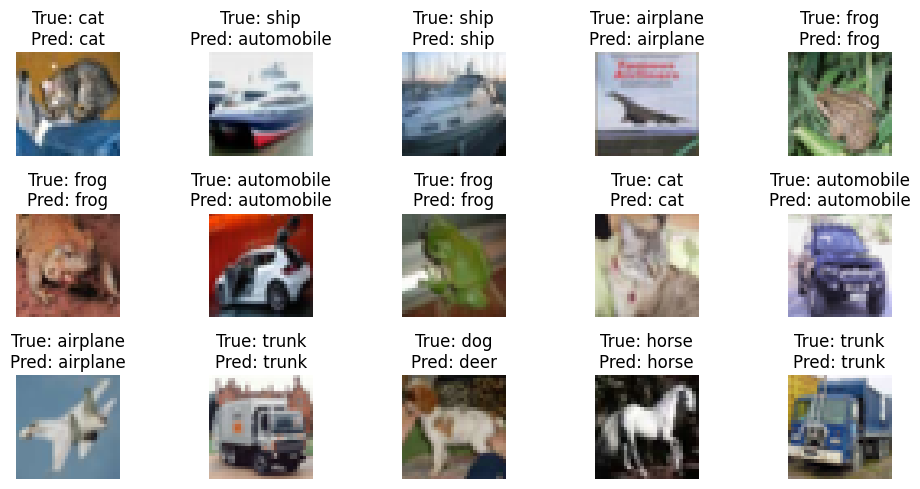

In [56]:
sample_images = X_test[:15]
sample_labels = Y_test[:15]
predictions = np.argmax(cnn_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 13. Plot accuracy and loss

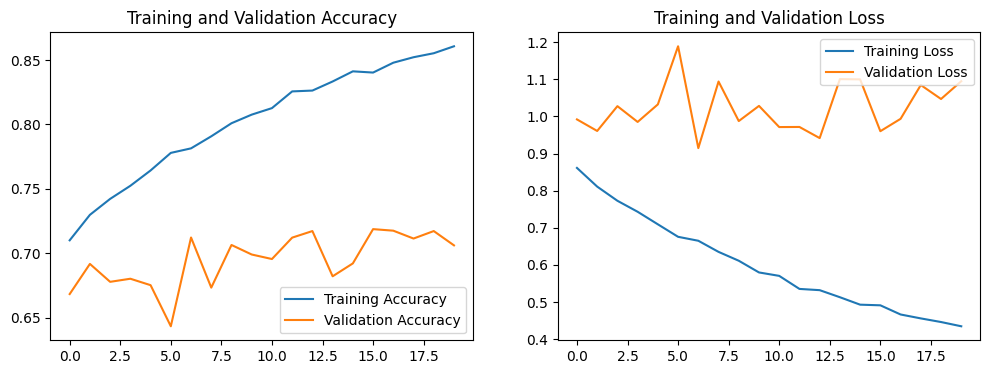

In [57]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

#14. Check Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


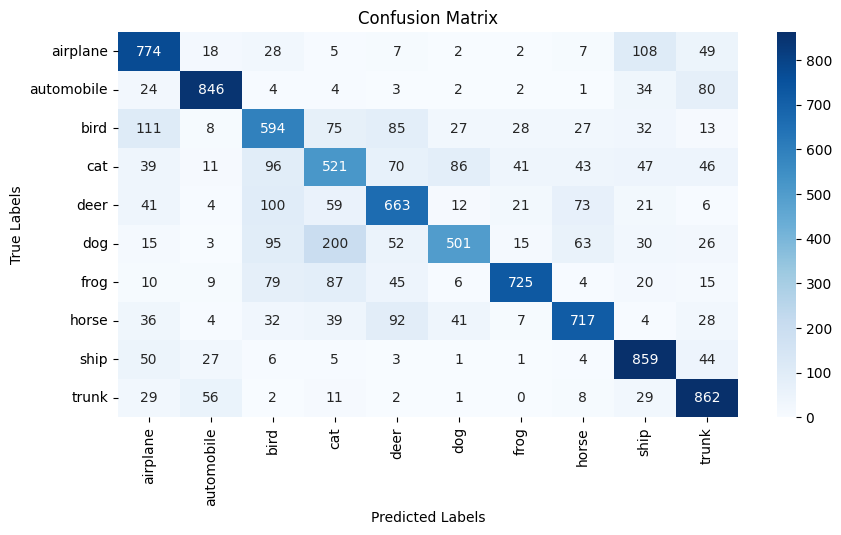

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical

Y_pred = np.argmax(cnn_model.predict(X_test), axis=1)

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#Generate a classification report


In [71]:
report = classification_report(Y_test, Y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.69      0.77      0.73      1000
  automobile       0.86      0.85      0.85      1000
        bird       0.57      0.59      0.58      1000
         cat       0.52      0.52      0.52      1000
        deer       0.65      0.66      0.66      1000
         dog       0.74      0.50      0.60      1000
        frog       0.86      0.72      0.79      1000
       horse       0.76      0.72      0.74      1000
        ship       0.73      0.86      0.79      1000
       trunk       0.74      0.86      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



#Save the Model

In [72]:
cnn_model.save('CNN_cifar10_model.h5')
print("Model saved as 'CNN_cifar10_model.h5'")

Model saved as 'CNN_cifar10_model.h5'


# Load and Use the Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


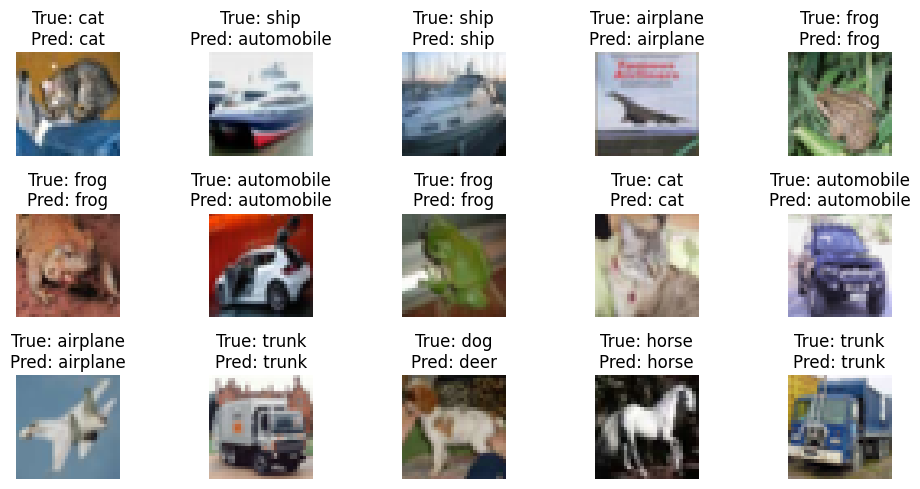

In [77]:
import seaborn as sns
loaded_model = tf.keras.models.load_model('CNN_cifar10_model.h5')

sample_images = X_test[:15]
sample_labels = Y_test[:15]
predictions = np.argmax(loaded_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()